In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler

In [25]:
df_train = pd.read_csv('E:/Kaggle/Titanic/titanic_data/train.csv')
df_test = pd.read_csv('E:/Kaggle/Titanic/titanic_data/test.csv')

In [26]:
op = df_train.append(df_test)

C:\Users\naive\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [27]:
op.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [28]:
op['Surnanme'] = op['Name'].apply(lambda x : x.split(',')[0].strip())

In [29]:
surname_dict = {}

In [30]:
surname_dict = op['Surnanme'].value_counts()

In [31]:
op['SurnameNum'] = op['Surnanme'].map(surname_dict)

In [59]:
pd.DataFrame(op['SurnameNum']).head()

,SurnameNum
0,2
1,2
2,1
3,2
4,2


In [64]:
full_op.reset_index(drop=True, inplace = True)
op.reset_index(drop=True, inplace=True)

In [65]:
full_op = pd.concat([full_op, op['SurnameNum']], axis=1)

In [34]:
full_op = pd.read_csv('full_data2.csv')

In [35]:
full_op.drop('Unnamed: 0', axis = 1, inplace=True)

In [45]:
len(pd.DataFrame(op['SurnameNum']))

1309

In [46]:
bins = [0, 10, 18, 40, 60, 80]

In [47]:
full_op['Age'] = pd.cut(full_op['Age'], bins)

In [49]:
full_op['Age'] = pd.factorize(full_op['Age'])[0]

In [52]:
full_op['Age'].value_counts()

0    837
1    227
3    115
2     97
4     33
Name: Age, dtype: int64

In [67]:
full_op.head()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Embarked_Dummy,title,sex,total_family,Fare_bin_id,Pclass_Fare_Category2,SurnameNum
0,0,7.2500,0,1,3,1,0,0,0,1,1,0,5,2
1,0,71.2833,0,2,1,1,1,1,1,0,1,1,1,2
2,0,7.9250,0,3,3,0,1,0,2,0,0,2,5,1
3,0,53.1000,0,4,1,1,1,0,1,0,1,1,1,2
4,0,8.0500,0,5,3,0,0,0,0,1,0,2,5,2


In [68]:
full_op.drop('PassengerId', axis=1, inplace=True)

In [77]:
full_op['Fare_new'] = full_op['Fare'].apply(lambda x : np.log(x) if x>0 else 0)

In [72]:
full_op.head()

,Age,Fare,Parch,Pclass,SibSp,Survived,Embarked_Dummy,title,sex,total_family,Fare_bin_id,Pclass_Fare_Category2,SurnameNum,Fare_new
0,0,7.2500,0,3,1,0,0,0,1,1,0,5,2,1.981001
1,0,71.2833,0,1,1,1,1,1,0,1,1,1,2,4.266662
2,0,7.9250,0,3,0,1,0,2,0,0,2,5,1,2.070022
3,0,53.1000,0,1,1,1,0,1,0,1,1,1,2,3.972177
4,0,8.0500,0,3,0,0,0,0,1,0,2,5,2,2.085672


In [73]:
full_op.to_csv('op_for_model.csv')

C:\Users\naive\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Origin_Fare')

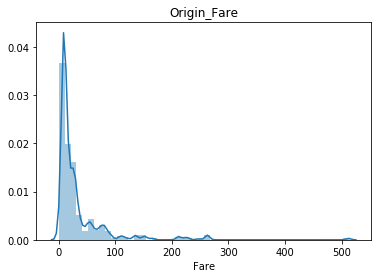

In [74]:
sns.distplot(full_op['Fare'])
plt.title('Origin_Fare')

C:\Users\naive\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Log_Fare')

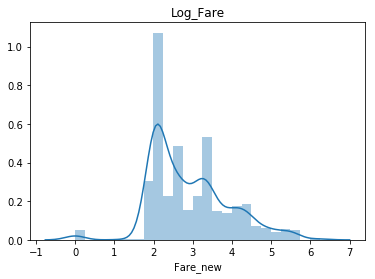

In [79]:
sns.distplot(full_op['Fare_new'])
plt.title('Log_Fare')

In [6]:
train_set = full_op[:891]
test_set = full_op[891:]

In [7]:
X_train = train_set.drop('Survived', axis = 1)
y_train = train_set['Survived']
X_test = test_set.drop('Survived', axis=1)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [9]:
from sklearn.externals import joblib

In [10]:
RF_para_grid = {'n_estimators' : [200, 250, 300, 350, 400,500,600,700,800,1000,1100,1200], 
                'criterion': ['entropy'],
                'max_depth' : [6, 8, 9, 10,11,12,13],
                'max_features': ['auto',5,6,7,8,9,10]}

In [12]:
RFC = RandomForestClassifier(random_state=42)
RF_Grid = GridSearchCV(RFC, RF_para_grid, cv=5, n_jobs=5, verbose=1, scoring = 'accuracy')
RF_Grid.fit(X_train, y_train)
RF_Model_Result = pd.DataFrame(RF_Grid.cv_results_)
RF_Model_Result.sort_values('rank_test_score', axis=0, ascending=True, inplace=True)
RF_Model_Result = RF_Model_Result[['params', 'rank_test_score', 'mean_test_score', 'mean_train_score']]
RF_Model_Result.to_csv('RF_MODEL_RESULT.csv')
joblib.dump(RF_Grid.best_estimator_, 'RF_BEST_MODEL2.pkl')

Fitting 5 folds for each of 588 candidates, totalling 2940 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    7.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   42.8s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  1.9min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:  3.5min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:  5.6min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:  8.3min
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed: 11.7min
[Parallel(n_jobs=5)]: Done 2940 out of 2940 | elapsed: 14.5min finished
C:\Users\naive\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\naive\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessin

['RF_BEST_MODEL2.pkl']

In [17]:
RF_predict = joblib.load('RF_BEST_MODEL2.pkl').predict(X_test)

In [18]:
RF_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [13]:
df_test = pd.read_csv('E:/Kaggle/Titanic/titanic_data/test.csv')

In [22]:
submission_RF = pd.DataFrame({'PassengerId': df_test['PassengerId'],
                              'Survived' : pd.Series(RF_predict)
})

In [22]:
submission_RF.to_csv('submission_RF.csv')

In [10]:
XGB_para_grid = {
              'objective':['binary:logistic'],
              'learning_rate': [0.01, 0.05,0,1], #so called `eta` value
              'max_depth': [5,7,9,11,12],
              'min_child_weight': [8,9,11,12],
              'colsample_bytree': [0.7],
              'n_estimators': [300, 500,700,900,1100,1200] #number of trees, change it to 1000 for better results
              }

In [11]:
from xgboost import XGBClassifier
import xgboost as xgb

In [12]:
xgb_classifier = xgb.XGBClassifier(random_state = 0)
xgb_grid = GridSearchCV(xgb_classifier, XGB_para_grid, cv = 5, n_jobs = 5, scoring = 'accuracy' )
xgb_grid.fit(X_train, y_train)
xgb_result = pd.DataFrame(xgb_grid.cv_results_)
xgb_result.sort_values('rank_test_score', axis=0, ascending=True, inplace=True)
xgb_result = xgb_result[['params', 'rank_test_score', 'mean_test_score', 'mean_train_score']]
xgb_result.to_csv('xgb_Model_result2.csv')
joblib.dump(xgb_grid.best_estimator_, 'XGB_BEST_MODEL2.pkl')

C:\Users\naive\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\naive\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\naive\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\naive\Anaconda3\lib\site-packages\sklearn\util

['XGB_BEST_MODEL2.pkl']

In [14]:
xgb_predict = xgb_grid.best_estimator_.predict(X_test)

In [21]:
submission_xgb = pd.DataFrame({'PassengerId': df_test['PassengerId'],
                              'Survived' : pd.Series(xgb_predict)
})

In [23]:
submission_xgb.to_csv('submission_xgb.csv')